In [20]:
import numpy as np
import pandas as pd 

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from wordcloud import WordCloud
import category_encoders as ce
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [22]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
train = pd.read_csv('../data/train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [24]:
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # Remove link
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text = re.sub('\s+', ' ', text).strip() # Remove leading, trailing, and extra spaces
    return text

def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    df['links'] = df['text'].apply(lambda x: find_links(x))
    # df['hashtags'].fillna(value='no', inplace=True)
    # df['mentions'].fillna(value='no', inplace=True)
    
    return df
    
train= process_text(train)
train

,id,keyword,location,text,target,text_clean,hashtags,mentions,links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,no,no,http://t.co/STfMbbZFB5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,no,aria_ahrary TheTawniest,no
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,no,no,http://t.co/zDtoyd8EbJ
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,no,no,no


In [25]:
train

,id,keyword,location,text,target,text_clean,hashtags,mentions,links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,no,no,http://t.co/STfMbbZFB5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,no,aria_ahrary TheTawniest,no
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,no,no,http://t.co/zDtoyd8EbJ
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,no,no,no


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Links
vec_links = CountVectorizer(min_df=5, analyzer='word', token_pattern=r'https?://\S+')  # Only include those >=5 occurrences
link_vec = vec_links.fit_transform(train['links'])
X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names_out())

# Mentions
vec_men = CountVectorizer(min_df=5)
men_vec = vec_men.fit_transform(train['mentions'])
X_train_men = pd.DataFrame(men_vec.toarray(), columns=vec_men.get_feature_names_out())

# Hashtags
vec_hash = CountVectorizer(min_df=5)
hash_vec = vec_hash.fit_transform(train['hashtags'])
X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names_out())

print(X_train_link.shape, X_train_men.shape, X_train_hash.shape)

(7613, 6) (7613, 18) (7613, 107)


In [27]:
X_train_link

,http://t.co/cybksxhf7d,http://t.co/encmhz6y34,http://t.co/ksawlyux02,http://t.co/q2eblokeve,http://t.co/qew4c5m1xd,http://t.co/vvplfqv58p
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7608,0,0,0,0,0,0
7609,0,0,0,0,0,0
7610,0,0,0,0,0,0
7611,0,0,0,0,0,0


In [28]:
X_train_hash

,abstorm,africa,afterlife,allah,animalrescue,antioch,armageddon,art,bb17,bbc,...,usa,usgs,wildfire,wildfires,wmata,womens,world,worldnews,wx,yyc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train_men

,ap,arianagrande,change,djicemoon,emmerdale,foxnews,invalid,justinbieber,mikeparractor,no,potus,stretcher,towel,usagov,usatoday,viralspell,youngheroesid,youtube
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words='english') 
text_vec = vec_text.fit_transform(train['text_clean'])

X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names_out())
X_train_text

,00,01,04,05,06,07,08,08 05,08 06,10,...,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûïwhen saw,ûò,ûó
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.340738,0.361616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train

,id,keyword,location,text,target,text_clean,hashtags,mentions,links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,no,no,http://t.co/STfMbbZFB5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,no,aria_ahrary TheTawniest,no
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,no,no,http://t.co/zDtoyd8EbJ
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,no,no,no


In [32]:
train = train.join(X_train_link, rsuffix='_link')
train = train.join(X_train_men, rsuffix='_mention')
train = train.join(X_train_hash, rsuffix='_hashtag')
train = train.join(X_train_text, rsuffix='_text')
train

,id,keyword,location,text,target,text_clean,hashtags,mentions,links,http://t.co/cybksxhf7d,...,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûïwhen saw,ûò,ûó
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,no,no,http://t.co/STfMbbZFB5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,no,aria_ahrary TheTawniest,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,no,no,http://t.co/zDtoyd8EbJ,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,no,no,no,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.preprocessing import MinMaxScaler
features_to_drop = ['id', 'keyword','location','text','text_clean', 'hashtags', 'mentions','links']
scaler = MinMaxScaler()

In [36]:
X = train.drop(columns = features_to_drop + ['target'])
y = train.target
X

,http://t.co/cybksxhf7d,http://t.co/encmhz6y34,http://t.co/ksawlyux02,http://t.co/q2eblokeve,http://t.co/qew4c5m1xd,http://t.co/vvplfqv58p,ap,arianagrande,change,djicemoon,...,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûïwhen saw,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
input_shape = X_train.shape[1]
model = models.Sequential()
model.add(layers.Dense(264, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 264)            │       481,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        33,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,513 (2.00 MB)

 Trainable params: 523,513 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5682 - loss: 0.6797 - val_accuracy: 0.6461 - val_loss: 0.6357
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7279 - loss: 0.5856 - val_accuracy: 0.7761 - val_loss: 0.5135
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8347 - loss: 0.4191 - val_accuracy: 0.7840 - val_loss: 0.5048
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8567 - loss: 0.3296 - val_accuracy: 0.7827 - val_loss: 0.5219
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8893 - loss: 0.2794 - val_accuracy: 0.7761 - val_loss: 0.5465
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9098 - loss: 0.2331 - val_accuracy: 0.7682 - val_loss: 0.6090
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9370 - loss: 0.1775 - val_accuracy: 0.7643 - val_loss: 0.6752
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9555 - loss: 0.1348 - val_accuracy: 0.

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

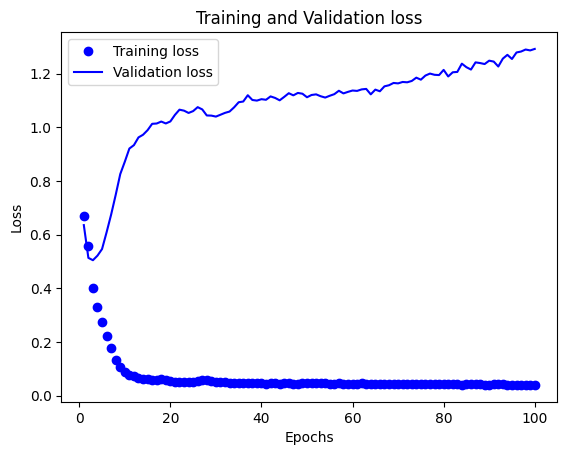

In [43]:
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

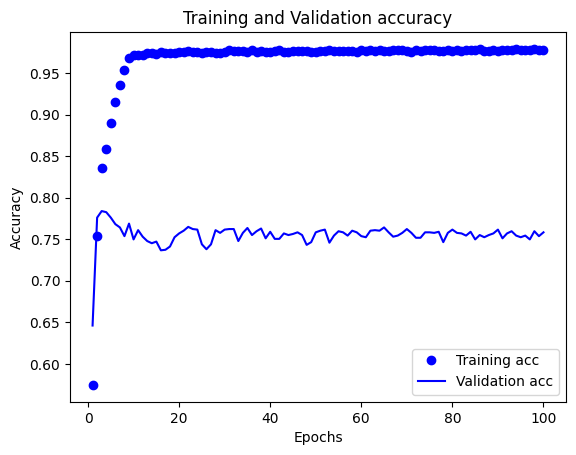

In [44]:
# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
model1 = models.Sequential()
model1.add(layers.Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dropout(0.4))  
model1.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dropout(0.4))  
model1.add(layers.Dense(1, activation='sigmoid')) 

In [46]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val)) 

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5710 - loss: 0.9780 - val_accuracy: 0.5739 - val_loss: 0.8849
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5766 - loss: 0.8598 - val_accuracy: 0.5870 - val_loss: 0.7959
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6186 - loss: 0.7727 - val_accuracy: 0.6888 - val_loss: 0.7207
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7250 - loss: 0.6908 - val_accuracy: 0.7571 - val_loss: 0.6489
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7926 - loss: 0.6129 - val_accuracy: 0.7787 - val_loss: 0.5943
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8174 - loss: 0.5463 - val_accuracy: 0.7873 - val_loss: 0.5718
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8357 - loss: 0.5024 - val_accuracy: 0.7840 - val_loss: 0.5705
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8447 - loss: 0.4752 - val_accuracy: 0.7846 - 

In [48]:
val_loss, val_accuracy = model1.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7355 - loss: 0.8072
Validation Loss: 0.7433241009712219, Validation Accuracy: 0.7596848607063293


In [49]:
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

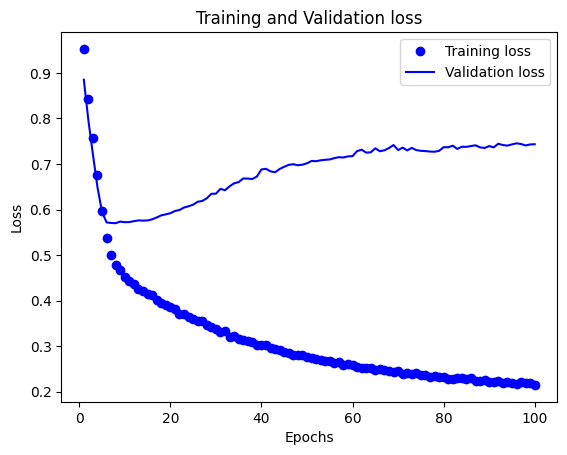

In [50]:
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

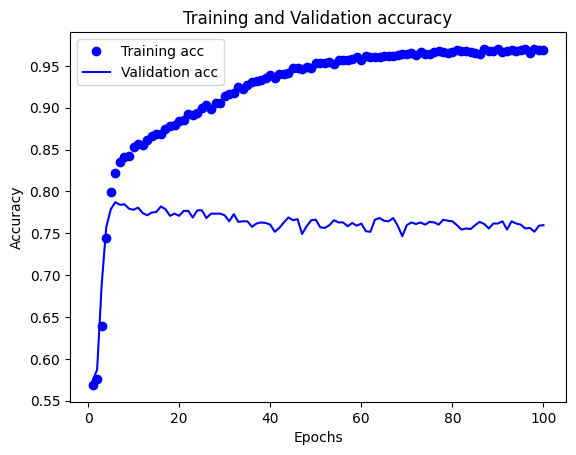

In [51]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dropout(0.4))  
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dropout(0.4))  
model2.add(layers.Dense(1, activation='sigmoid')) 

In [69]:
model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [70]:
history2 = model2.fit(X_train, y_train, epochs=6, batch_size=512, validation_data=(X_val, y_val)) 

Epoch 1/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5245 - loss: 0.9827 - val_accuracy: 0.5739 - val_loss: 0.8877
Epoch 2/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5684 - loss: 0.8631 - val_accuracy: 0.5831 - val_loss: 0.7974
Epoch 3/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6274 - loss: 0.7739 - val_accuracy: 0.7137 - val_loss: 0.7197
Epoch 4/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7402 - loss: 0.6931 - val_accuracy: 0.7525 - val_loss: 0.6469
Epoch 5/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7922 - loss: 0.6093 - val_accuracy: 0.7794 - val_loss: 0.5911
Epoch 6/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8173 - loss: 0.5444 - val_accuracy: 0.7892 - val_loss: 0.5658


In [83]:
train = pd.read_csv('../data/train.csv')

def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # Remove link
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text = re.sub('\s+', ' ', text).strip() # Remove leading, trailing, and extra spaces
    return text

def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    df['links'] = df['text'].apply(lambda x: find_links(x))
    
    return df
def transform_text(train, input_text):
    test = pd.DataFrame({'text': [input_text]})
    train= process_text(train)
    test = process_text(test)

    from sklearn.feature_extraction.text import CountVectorizer

    # Links
    vec_links = CountVectorizer(min_df=5, analyzer='word', token_pattern=r'https?://\S+')  # Only include those >=5 occurrences
    link_vec = vec_links.fit_transform(train['links'])
    link_vec_test = vec_links.transform(test['links'])
    X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names_out())
    X_test_link = pd.DataFrame(link_vec_test.toarray(), columns=vec_links.get_feature_names_out())

    # Mentions
    vec_men = CountVectorizer(min_df=5)
    men_vec = vec_men.fit_transform(train['mentions'])
    men_vec_test = vec_men.transform(test['mentions'])
    X_train_men = pd.DataFrame(men_vec.toarray(), columns=vec_men.get_feature_names_out())
    X_test_men = pd.DataFrame(men_vec_test.toarray(), columns=vec_men.get_feature_names_out())

    # Hashtags
    vec_hash = CountVectorizer(min_df=5)
    hash_vec = vec_hash.fit_transform(train['hashtags'])
    hash_vec_test = vec_hash.transform(test['hashtags'])
    X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names_out())
    X_test_hash = pd.DataFrame(hash_vec_test.toarray(), columns=vec_hash.get_feature_names_out())

    from sklearn.feature_extraction.text import TfidfVectorizer

    vec_text = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words='english') 
    # Only include >=10 occurrences, use unigrams and bigrams
    text_vec = vec_text.fit_transform(train['text_clean'])
    text_vec_test = vec_text.transform(test['text_clean'])

    X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names_out())
    X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names_out())

    train = train.join(X_train_link, rsuffix='_link')
    train = train.join(X_train_men, rsuffix='_mention')
    train = train.join(X_train_hash, rsuffix='_hashtag')
    train = train.join(X_train_text, rsuffix='_text')
    test = test.join(X_test_link, rsuffix='_link')
    test = test.join(X_test_men, rsuffix='_mention')
    test = test.join(X_test_hash, rsuffix='_hashtag')
    test = test.join(X_test_text, rsuffix='_text')
    
    from sklearn.preprocessing import MinMaxScaler
    X = train.drop(columns = ['id', 'keyword','location','text','text_clean', 'hashtags', 'mentions','links', 'target'])
    X_test = test.drop(columns = ['text','text_clean', 'hashtags', 'mentions','links'])
    y = train.target
    return X, y, X_test    

In [84]:
train = pd.read_csv('../data/train.csv')
input_text = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
X, y , X_test = transform_text(train, input_text)

In [85]:
X

,http://t.co/cybksxhf7d,http://t.co/encmhz6y34,http://t.co/ksawlyux02,http://t.co/q2eblokeve,http://t.co/qew4c5m1xd,http://t.co/vvplfqv58p,ap,arianagrande,change,djicemoon,...,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûïwhen saw,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [87]:
X_test

,http://t.co/cybksxhf7d,http://t.co/encmhz6y34,http://t.co/ksawlyux02,http://t.co/q2eblokeve,http://t.co/qew4c5m1xd,http://t.co/vvplfqv58p,ap,arianagrande,change,djicemoon,...,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûïwhen saw,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
